In [2]:
import  glob

In [3]:
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import keras as k


In [4]:
from google.colab import files #use to upload the data on colab
uploaded=files.upload()

Saving kidney_disease.csv to kidney_disease.csv


In [5]:
df=pd.read_csv('kidney_disease.csv')

In [6]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
df.shape

(400, 26)

In [8]:
col_to_keep=['sg','al','sc','hemp','pcv','wc','rc','htn','classification']                  #these cols should be kept for creating and predicting the value from new dataset

In [9]:
df=df.drop( [col for col in df.columns if not col in col_to_keep] , axis=1 )               #drop the columns which are not in the new list

In [10]:
df=df.dropna(axis=0)                                                                                               #drop the null or missing values in the dataset

In [11]:
#to transform the non- numeric data into the columns
for column in df.columns:
  if df[column].dtype == np.number:
    continue
  df[column] = LabelEncoder().fit_transform( df[column] ) 

In [12]:
df.head()

,sg,al,sc,pcv,wc,rc,htn,classification
0,1.020,1.0,1.2,26,65,30,1,0
3,1.005,4.0,3.8,14,55,15,1,0
4,1.010,2.0,1.4,17,61,23,0,0
5,1.015,3.0,1.1,21,65,21,1,0
7,1.015,2.0,1.1,26,57,27,0,0


In [13]:
#split the data into independent dataset(feature dataset) and dependent dataset(target dataset)
x=df.drop( ['classification'], axis=1 )
y=df['classification']

In [14]:
x_scaler=MinMaxScaler()       #minmaxscaler sclales the values so that all the values in the dataset lies between 0 and 1
x_scaler.fit(x)
col_names = x.columns
x[col_names] = x_scaler.transform(x)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [16]:
model = Sequential()
model.add( Dense(256, input_dim= len(x.columns) , kernel_initializer = k.initializers.random_normal(seed = 13), activation='relu') )
model.add( Dense(1, activation='hard_sigmoid') )

In [17]:
model.compile( loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'] )

In [18]:
history= model.fit(x_train, y_train, epochs= 2000, batch_size= x_train.shape[0], shuffle = True)

Epoch 1/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.6702
Epoch 2/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6785 - accuracy: 0.8168
Epoch 3/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6691 - accuracy: 0.8168
Epoch 4/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6599 - accuracy: 0.8168
Epoch 5/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6509 - accuracy: 0.8063
Epoch 6/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6422 - accuracy: 0.8063
Epoch 7/2000
1/1 [==============================] - 0s 981us/step - loss: 0.6336 - accuracy: 0.8115
Epoch 8/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6251 - accuracy: 0.8115
Epoch 9/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6168 - accuracy: 0.8168
Epoch 10/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6088 - accuracy: 0.8377
Epoch 11/2000
1/1

In [19]:
#model.save('ckpd.model')

Text(0.5, 0, 'epochs')

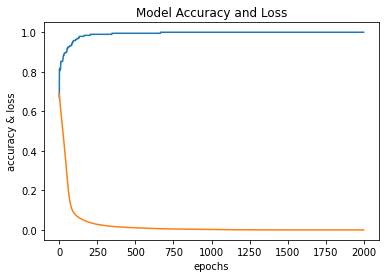

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy and Loss')
plt.ylabel('accuracy & loss')
plt.xlabel('epochs')

In [21]:
print("shape of train data : ", x_train.shape)
print("shape of test data : ", x_test.shape)

shape of train data :  (191, 7)
shape of test data :  (48, 7)


In [23]:
pred = model.predict(x_test)
pred = [1 if y>=0.5 else 0 for y in pred]

print( 'Original : {0}'.format(", ".join( str(x) for x in y_test) ) )
print( 'Predicted : {0}'.format(", ".join( str(x) for x in pred ) ) )

Original : 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1
Predicted : 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1
